# Simple linear regression model

In [6]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [7]:
housing = pd.read_csv('housing.csv')
housing.head()

,Unnamed: 0,LSTAT,INDUS,NOX,RM,MEDV
0,0,4.98,2.31,0.538,6.575,24.0
1,1,9.14,7.07,0.469,6.421,21.6
2,2,4.03,7.07,0.469,7.185,34.7
3,3,2.94,2.18,0.458,6.998,33.4
4,4,5.33,2.18,0.458,7.147,36.2


# Simple linear regression

$y_i = \beta_0 + \beta_1 * x_i + \epsilon_i $

### We shall base on the association between LSTAT and MEDV and create a simple linear regression model. Let's use python in estimating the values of B0 and B1 (intercept and slope)

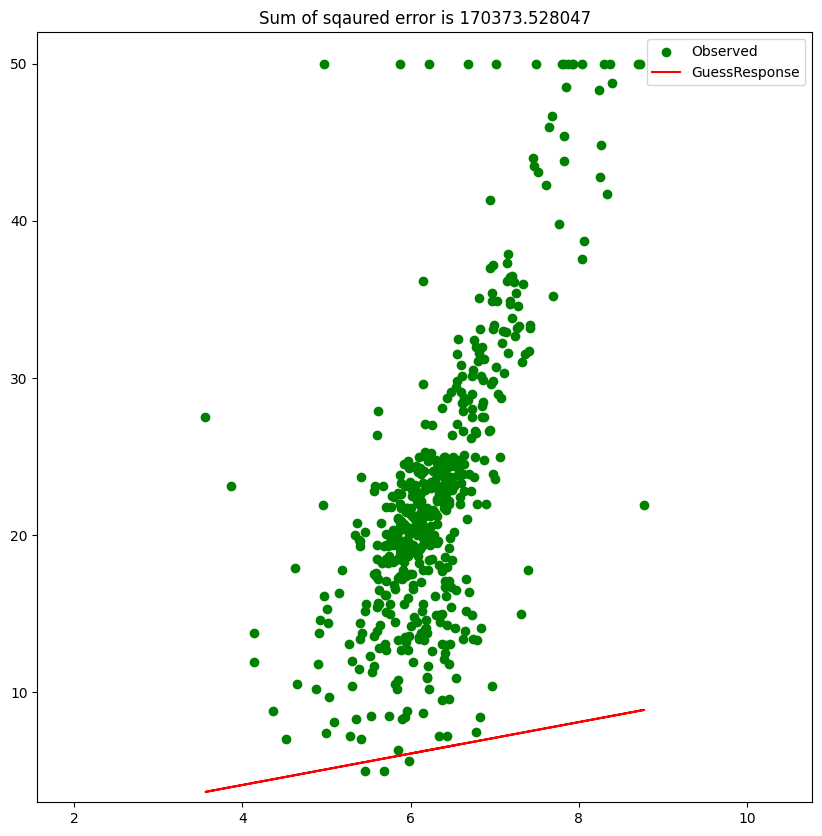

In [8]:
# lets try to guess what are the real values of intercept and slope
# we call our guess b0, b1...
# Try to assign the value of b0, b1 to get a straight line that can describe our data 
b0 = 0.1
b1 = 1
housing['GuessResponse'] = b0 + b1*housing['RM']

# Also want to know the error of of guess...
# This show how far is our guess response from the true response
housing['observederror'] = housing['MEDV'] - housing['GuessResponse']


# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format((((housing['observederror'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

# Least sqaure estimates

C:\Users\pc\AppData\Local\Temp\ipykernel_19488\3108435670.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0_ols = model.params[0]
C:\Users\pc\AppData\Local\Temp\ipykernel_19488\3108435670.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1_ols = model.params[1]


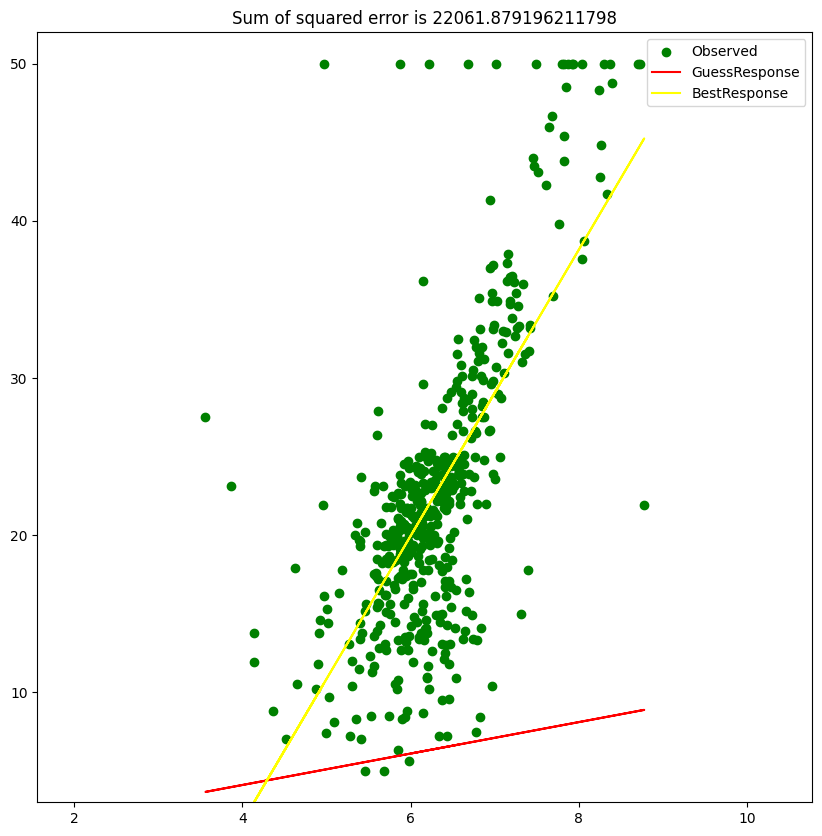

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           2.49e-74
Time:                        19:21:57   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Make an initial guess for the intercept and slope
b0 = 0.1  # initial intercept
b1 = 1    # initial slope

# Define the regression formula: MEDV as a function of RM
formula = 'MEDV~RM'

# Create and fit the linear regression model using OLS (Ordinary Least Squares)
model = smf.ols(formula=formula, data=housing).fit()

# Calculate the prediction based on the initial guess
housing['GuessResponse'] = b0 + b1*housing['RM']

# Calculate the error of the initial guess (difference from actual values)
housing['observederror'] = housing['MEDV'] - housing['GuessResponse']

# Retrieve the intercept and slope estimated by the OLS model (best fit)
b0_ols = model.params[0]
b1_ols = model.params[1]

# Calculate the prediction optimized by the OLS model
housing['BestResponse'] = b0_ols + b1_ols*housing['RM']

# Calculate the error of the fitted model
housing['error'] = housing['MEDV'] - housing['BestResponse']

# Plot the graph
plt.figure(figsize=(10, 10))
plt.title('Sum of squared error is {}'.format(((housing['error'])**2).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')  # actual points
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')  # initial guess line
plt.plot(housing['RM'], housing['BestResponse'], color='yellow', label='BestResponse')  # optimized model line
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

# Display the full summary of the OLS model (coefficients, P-value, R², etc.)
print(model.summary())


## author
[gatsoundou junior](https://www.linkedin.com/in/junior-stevy-gatsoundou-20339b25b/)